In [1]:
import matplotlib.pyplot as plt
from os.path import isfile, join, abspath, dirname
from os import listdir
import sys

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.insert(0, '../src/')

In [4]:
from logger import LogData, TemporalLogger, EnvLogger

In [5]:
__file__ = "analysis.ipynb"
log_dir = join(dirname(dirname(abspath(__file__))), "log")
log_att_dir = join(dirname(dirname(abspath(__file__))), "log_feat_test")

In [27]:
el = EnvLogger("BreakoutNoFrameskip-v0", log_dir, 250)

In [28]:
el.params_df.columns

Index(['env_name', 'num_envs', 'n_stack', 'rollout_size', 'num_updates',
       'max_grad_norm', 'curiosity_coeff', 'icm_beta', 'value_coeff',
       'entropy_coeff', 'attention_target', 'attention_type', 'reward_type',
       'timestamp', 'mean_reward', 'mean_feat_std', 'mean_proxy'],
      dtype='object')

In [29]:
cols = ['attention_target', 'attention_type', 'env_name', 
        'timestamp', 'mean_reward',
       'mean_feat_std', 'mean_proxy']

In [30]:
el.params_df[cols].sort_values(by=["mean_reward", "mean_proxy"], ascending=False)#.loc[el.params_df.timestamp == '2019-07-20 10_21_45']

,attention_target,attention_type,env_name,timestamp,mean_reward,mean_feat_std,mean_proxy
0,AttentionTarget.NONE,AttentionType.SINGLE_ATTENTION,BreakoutNoFrameskip-v0,2019-09-13 15_35_51,32.73341,0.315082,10.313701
1,AttentionTarget.ICM,AttentionType.SINGLE_ATTENTION,BreakoutNoFrameskip-v0,2019-09-14 19_09_01,32.07585,0.336244,10.785300
2,AttentionTarget.ICM,AttentionType.DOUBLE_ATTENTION,BreakoutNoFrameskip-v0,2019-09-15 22_42_16,31.07206,0.356506,11.077373


2019-09-12 11_12_02


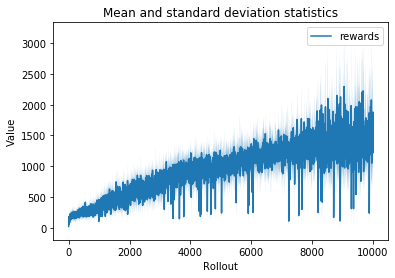

2019-09-14 01_05_00


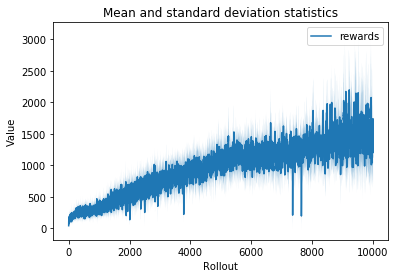

In [45]:
el.plot_mean_std(*["rewards"])

2019-09-12 11_12_02


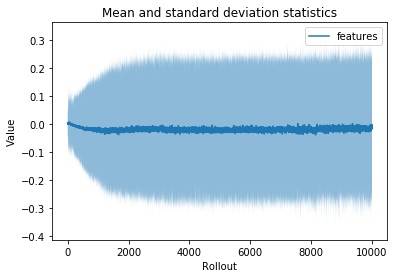

2019-09-14 01_05_00


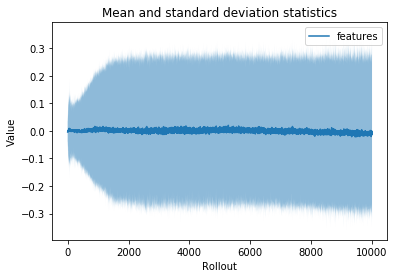

In [46]:
el.plot_mean_std(*["features"])

key=2019-09-13 15_35_51, proxy_val=10.313700930771233
key=2019-09-14 19_09_01, proxy_val=10.78530022187233
key=2019-09-15 22_42_16, proxy_val=11.077372734462617


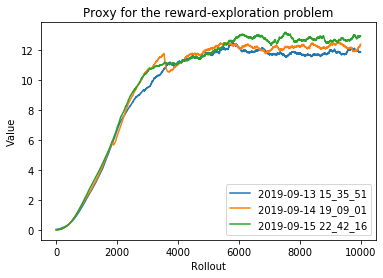

In [54]:
el.plot_proxy()

key=2019-09-13 15_35_51, mean_reward=32.733410000000006
key=2019-09-14 19_09_01, mean_reward=32.07585
key=2019-09-15 22_42_16, mean_reward=31.072059999999997


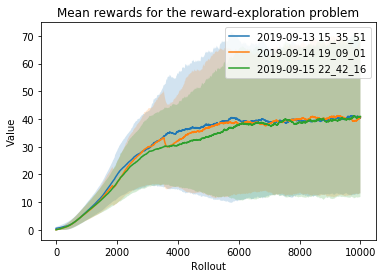

In [33]:
el.plot_rewards()

key=2019-09-12 11_10_20, mean_reward=-1.0337042857142857
key=2019-09-12 11_08_48, mean_reward=8.0724
key=2019-09-13 23_20_51, mean_reward=8.1614875
key=2019-09-15 11_47_05, mean_reward=8.776584999999999


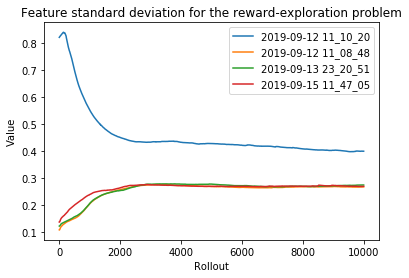

In [62]:
el.plot_feat_std()